<a href="https://colab.research.google.com/github/Pri19GIT/Text-Generation/blob/main/text_generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
!wget https://www.gutenberg.org/files/1661/1661-0.txt -o book.txt

In [51]:
text=open('1661-0.txt','r',encoding='utf-8').read()
text=text.lower()

In [52]:
sentences=text.split('\n')

In [53]:
import tensorflow as tf
import keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [54]:
tokenizer=Tokenizer(oov_token="<UNK>")

In [55]:
tokenizer.fit_on_texts(sentences)

In [56]:
vocab_size=len(tokenizer.word_index)+1
vocab_size

8933

In [57]:
sequences=tokenizer.texts_to_sequences(sentences)

In [58]:
input_sequences=[]
for sequence in sequences:
  for i in range(1,len(sequence)):
    n_gram_sequence=sequence[:i+1]
    input_sequences.append(n_gram_sequence)

In [59]:
print(input_sequences[0],input_sequences[1])

[146, 4790] [146, 4790, 2]


In [60]:
max_seq_len=max([len(seq) for seq in input_sequences])
max_seq_len

20

In [61]:
padded_sequences=pad_sequences(input_sequences,maxlen=max_seq_len)

In [62]:
print(padded_sequences[0],padded_sequences[1])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0  146 4790] [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0  146 4790    2]


In [63]:
import numpy as np
padded_sequences=np.array(padded_sequences)

In [64]:
x=padded_sequences[:,:-1]
labels=padded_sequences[:,-1]

In [65]:
y=tf.keras.utils.to_categorical(labels,num_classes=vocab_size)

In [66]:
y.shape


(101619, 8933)

In [67]:
x.shape

(101619, 19)

In [68]:
#importing dependencies for model
import tensorflow  as tf
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense
#from tensorflow.keras.optimisers import Adam

In [69]:
model=Sequential()
model.add(Embedding(vocab_size,100,input_length=max_seq_len))
model.add(Bidirectional(LSTM(256)))
model.add(Dense(vocab_size,activation='softmax'))
#adam=Adam(learning_rate=0.01)
model.compile(optimizer= keras.optimizers.Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 20, 100)           893300    
_________________________________________________________________
bidirectional_3 (Bidirection (None, 512)               731136    
_________________________________________________________________
dense_3 (Dense)              (None, 8933)              4582629   
Total params: 6,207,065
Trainable params: 6,207,065
Non-trainable params: 0
_________________________________________________________________


In [70]:
from tensorflow.keras.callbacks import EarlyStopping
es=EarlyStopping(monitor='acc',min_delta=0.01)


In [71]:
model.fit(x,y,epochs=50,verbose=1, batch_size=512,callbacks=[es])

Epoch 1/50
199/199 [==============================] - 219s 1s/step - loss: 6.6876 - acc: 0.0608
Epoch 2/50
199/199 [==============================] - 218s 1s/step - loss: 5.3298 - acc: 0.1393
Epoch 3/50
199/199 [==============================] - 218s 1s/step - loss: 4.7380 - acc: 0.1742
Epoch 4/50
199/199 [==============================] - 216s 1s/step - loss: 4.1612 - acc: 0.2106
Epoch 5/50
199/199 [==============================] - 218s 1s/step - loss: 3.6490 - acc: 0.2608
Epoch 6/50
199/199 [==============================] - 217s 1s/step - loss: 3.1766 - acc: 0.3193
Epoch 7/50
199/199 [==============================] - 217s 1s/step - loss: 2.7872 - acc: 0.3801
Epoch 8/50
199/199 [==============================] - 217s 1s/step - loss: 2.4789 - acc: 0.4321
Epoch 9/50
199/199 [==============================] - 215s 1s/step - loss: 2.2217 - acc: 0.4804
Epoch 10/50
199/199 [==============================] - 216s 1s/step - loss: 2.0055 - acc: 0.5214
Epoch 11/50
199/199 [==================

In [71]:
#time for some story telling
seed_text="I could not help laughing at the ease with which he explained his deduction"
next_words=100

for _ in range(next_words):
  sequence=tokenizer.texts_to-sequence([seed_text])
  padded=pad_sequences(sequences.maxlen=max_seq_len)
  predicted=model.predict_classes(padded, verbose=0)
  output_word=''
  for word,index in tokenizer.word_index.items():
    if index==predicted:
      output_word=word
      break
  seed_text+=' '+output_word
print(seed_text)


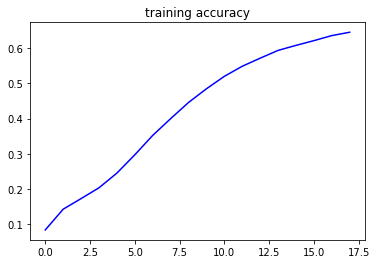

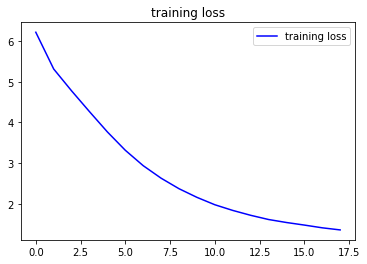

In [74]:
import matplotlib.pyplot as plt
history=model.history
acc=history.history['acc']
loss=history.history['loss']
epochs=range(len(acc))

plt.plot(epochs,acc,'b',label='Training accuracy')
plt.title('training accuracy')

plt.figure()

plt.plot(epochs,loss,'b',label='training loss')
plt.title('training loss')
plt.legend()
plt.show()